# P5 - Segmentez des clients d'un site e-commerce¶

## Nettoyage et analyse des données 

In [1]:
# Chargement des librairies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Chargement du jeu de données 
customers = pd.read_csv('olist_customers_dataset.csv')
geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')

## Focus sur chaque jeu de donné

### Customers

In [193]:
# dimension dataframe
customers.shape

(99441, 5)

In [194]:
# contenu des premières lignes
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [195]:
# creation fonction description_variables
def description_variables(dataframe, type_var):
    """
    Retourne la description de toutes les variables du dataframe :
    type, nombre de nan, % de nan et desc Parameters
    'all': tous les types de variables
    'cat' :variables catégorielles
     'num':variables quantitative
    """
    if type_var == 'num':
        desc_var = dataframe.describe()
    elif type_var == 'cat':
        desc_var = dataframe.describe(exclude=[np.number])

    desc_type = pd.DataFrame(dataframe[desc_var.columns].dtypes, columns=['type']).T
    nb_nan = dataframe.isnull().sum()
    pourcentage_nan = dataframe.isnull().mean()*100
    desc_nan = pd.DataFrame([nb_nan, pourcentage_nan],
                            index=['nb_nan', '%_nan'])
    desc_var = pd.concat([desc_type, desc_nan, desc_var])

    return desc_var

In [196]:
description_variables(customers,'cat')

,customer_id,customer_unique_id,customer_city,customer_state,customer_zip_code_prefix
type,object,object,object,object,NaN
nb_nan,0.0,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0,0.0
count,99441,99441,99441,99441,NaN
unique,99441,96096,4119,27,NaN
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP,NaN
freq,1,17,15540,41746,NaN


In [197]:
description_variables(customers,'num')

,customer_zip_code_prefix,customer_id,customer_unique_id,customer_city,customer_state
type,int64,NaN,NaN,NaN,NaN
nb_nan,0.0,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0,0.0
count,99441.0,NaN,NaN,NaN,NaN
mean,35137.474583,NaN,NaN,NaN,NaN
std,29797.938996,NaN,NaN,NaN,NaN
min,1003.0,NaN,NaN,NaN,NaN
25%,11347.0,NaN,NaN,NaN,NaN
50%,24416.0,NaN,NaN,NaN,NaN
75%,58900.0,NaN,NaN,NaN,NaN


#### customer_id 

In [198]:
# vérif doublons
customers.duplicated(subset=['customer_id']).sum()

0

In [199]:
# customer_unique_id
df_customers=customers.groupby('customer_unique_id')[['customer_id']].size().sort_values(ascending=False)

In [200]:
df_customers=pd.DataFrame(df_customers)
df_customers

,0
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
5657dfebff5868c4dc7e8355fea865c4,1
5657596addb4d7b07b32cd330614bdf8,1
5656eb169546146caeab56c3ffc3d268,1


In [201]:
# Calculer le nombre de commande par client

nbre_commande=customers.groupby('customer_unique_id').size().value_counts()

In [202]:
tableau_commandes_clients=pd.DataFrame({'nbre_commande':nbre_commande.index,'nbre_client':nbre_commande.values})

In [203]:
tableau_commandes_clients

,nbre_commande,nbre_client
0,1,93099
1,2,2745
2,3,203
3,4,30
4,5,8
5,6,6
6,7,3
7,9,1
8,17,1


In [204]:
# nombre de clients avec identifiant unique
nbre_client_tot=customers['customer_unique_id'].nunique()
nbre_client_tot

96096

In [205]:
tableau_commandes_clients.assign( pourc_clients = tableau_commandes_clients['nbre_client']/nbre_client_tot*100)

,nbre_commande,nbre_client,pourc_clients
0,1,93099,96.881244
1,2,2745,2.856518
2,3,203,0.211247
3,4,30,0.031219
4,5,8,0.008325
5,6,6,0.006244
6,7,3,0.003122
7,9,1,0.001041
8,17,1,0.001041


#### customer_city

In [3]:
# déterminer les cités les plus evoquées dans les commandes

df_city=pd.DataFrame(customers.customer_city.value_counts())
df_city

,customer_city
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
bequimao,1
andarai,1
vargem grande,1
curvelandia,1


#### customer_state

In [4]:
# déterminer les régions les plus évoqués dans les commandes
df_region=pd.DataFrame(customers.customer_state.value_counts())
df_region

,customer_state
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033
GO,2020


#### customer_zip_code_prefix

In [208]:
customers.customer_zip_code_prefix.head(5)

0    14409
1     9790
2     1151
3     8775
4    13056
Name: customer_zip_code_prefix, dtype: int64

In [209]:
#cette variable a été traitée comme numérique il faut la changer en objet 
customers.customer_zip_code_prefix=customers.customer_zip_code_prefix.astype('str')

In [210]:
#cette variable doit contenir 5 chiffres 
customers.customer_zip_code_prefix=customers.customer_zip_code_prefix.str.rjust(5,'0')

In [211]:
customers.customer_zip_code_prefix.head(5)

0    14409
1    09790
2    01151
3    08775
4    13056
Name: customer_zip_code_prefix, dtype: object

####  Bilan_customers

###  Géolocalisation

In [212]:
#dimensions
geolocalisation.shape

(1000163, 5)

In [213]:
#premieres ligens
geolocalisation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [214]:
# description des variables
description_variables(geolocalisation,'cat')

,geolocation_city,geolocation_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
type,object,object,NaN,NaN,NaN
nb_nan,0.0,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0,0.0
count,1000163,1000163,NaN,NaN,NaN
unique,8011,27,NaN,NaN,NaN
top,sao paulo,SP,NaN,NaN,NaN
freq,135800,404268,NaN,NaN,NaN


In [215]:
description_variables(geolocalisation,'num')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
type,int64,float64,float64,NaN,NaN
nb_nan,0.0,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0,0.0
count,1000163.0,1000163.0,1000163.0,NaN,NaN
mean,36574.166466,-21.176153,-46.390541,NaN,NaN
std,30549.33571,5.715866,4.269748,NaN,NaN
min,1001.0,-36.605374,-101.466766,NaN,NaN
25%,11075.0,-23.603546,-48.573172,NaN,NaN
50%,26530.0,-22.919377,-46.637879,NaN,NaN
75%,63504.0,-19.97962,-43.767709,NaN,NaN


#### geolocation_zip_code_prefix

In [216]:
# comme pour customers le transformer en objet 
geolocalisation.geolocation_zip_code_prefix=geolocalisation.geolocation_zip_code_prefix.astype('str')

In [217]:
# comme pour customers il doit avoir 5 chiffres
geolocalisation.geolocation_zip_code_prefix=geolocalisation.geolocation_zip_code_prefix.str.rjust(5,'0')

In [218]:
geolocalisation.shape

(1000163, 5)

In [219]:
# Regrouper les latitudes/longitudes par leurs moyennes
geolocalisation = geolocalisation.groupby('geolocation_zip_code_prefix') \
    .agg({'geolocation_lat': 'mean', 'geolocation_lng': 'mean',
          'geolocation_city': 'first', 'geolocation_state': 'first'}) \
    .reset_index()
# Vérification
geolocalisation['geolocation_zip_code_prefix'].nunique()

19015

#### Bilan_geolocalisation

In [220]:
# supprimer les variables inutiles à la fusion
geolocalisation.drop('geolocation_city', axis=1,inplace=True)
geolocalisation.drop('geolocation_state',axis=1,inplace=True)

### order_items

In [221]:
#dimensions
order_items.shape

(112650, 7)

In [222]:
#premeires lignes
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [223]:
# description des variables 
description_variables(order_items,'cat')

,order_id,product_id,seller_id,shipping_limit_date,order_item_id,price,freight_value
type,object,object,object,object,NaN,NaN,NaN
nb_nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,112650,112650,112650,112650,NaN,NaN,NaN
unique,98666,32951,3095,93318,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,NaN
freq,21,527,2033,21,NaN,NaN,NaN


In [224]:
description_variables(order_items,'num')

,order_item_id,price,freight_value,order_id,product_id,seller_id,shipping_limit_date
type,int64,float64,float64,NaN,NaN,NaN,NaN
nb_nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,112650.0,112650.0,112650.0,NaN,NaN,NaN,NaN
mean,1.197834,120.653739,19.99032,NaN,NaN,NaN,NaN
std,0.705124,183.633928,15.806405,NaN,NaN,NaN,NaN
min,1.0,0.85,0.0,NaN,NaN,NaN,NaN
25%,1.0,39.9,13.08,NaN,NaN,NaN,NaN
50%,1.0,74.99,16.26,NaN,NaN,NaN,NaN
75%,1.0,134.9,21.15,NaN,NaN,NaN,NaN


In [225]:
order_items.order_id.nunique()

98666

#### order_id  and order_item_id

In [226]:
# déterminer le nombre de fois qu'un article a été commandé
nbre_items=pd.DataFrame(order_items.order_item_id.value_counts())

In [227]:
nbre_items

,order_item_id
1,98666
2,9803
3,2287
4,965
5,460
6,256
7,58
8,36
9,28
10,25


In [228]:
order_items[order_items['order_item_id'] == 1]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


<AxesSubplot:>

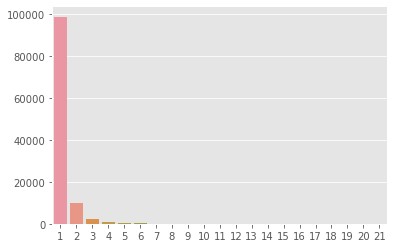

In [229]:
# visualisation du nombre d'article dans une commande
df_item_id = order_items['order_item_id'].value_counts()
sns.barplot(x=df_item_id.index, y=df_item_id.values)

#### shipping_limit_date

In [230]:
# transformer cette variable en datetime
import datetime
order_items.shipping_limit_date=pd.to_datetime(order_items.shipping_limit_date,format='%Y-%m-%d %H:%M:%S')

In [231]:
# vérif
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

#### Bilan_order_items

### Order_payments

In [232]:
# dimensions
order_payments.shape

(103886, 5)

In [233]:
#premieres lignes
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [234]:
#descriptions
description_variables(order_payments,'cat')

,order_id,payment_type,payment_sequential,payment_installments,payment_value
type,object,object,NaN,NaN,NaN
nb_nan,0.0,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0,0.0
count,103886,103886,NaN,NaN,NaN
unique,99440,5,NaN,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card,NaN,NaN,NaN
freq,29,76795,NaN,NaN,NaN


In [235]:
description_variables(order_payments,'num')

,payment_sequential,payment_installments,payment_value,order_id,payment_type
type,int64,int64,float64,NaN,NaN
nb_nan,0.0,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0,0.0
count,103886.0,103886.0,103886.0,NaN,NaN
mean,1.092679,2.853349,154.10038,NaN,NaN
std,0.706584,2.687051,217.494064,NaN,NaN
min,1.0,0.0,0.0,NaN,NaN
25%,1.0,1.0,56.79,NaN,NaN
50%,1.0,1.0,100.0,NaN,NaN
75%,1.0,4.0,171.8375,NaN,NaN


#### payment_sequential

#### payment_type

In [236]:
#nbre de type de paiement
order_payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

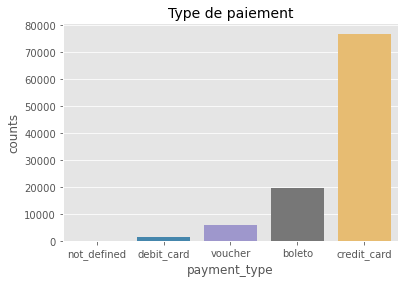

In [237]:
#visualisation des types de paieents
payment_type = order_payments.groupby(['payment_type']).size().reset_index(name='counts').sort_values(by='counts')
sns.barplot(x=payment_type['payment_type'],y=payment_type['counts'])
plt.title("Type de paiement", fontsize=14);

#### payment_installments

In [238]:
order_payments.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

#### Bilan_order_payments

### order_reviews

In [239]:
#dimensions
order_reviews.shape

(99224, 7)

In [240]:
#premières lignes
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [241]:
#descriptions
description_variables(order_reviews,'cat')

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score
type,object,object,object,object,object,object,NaN
nb_nan,0.0,0.0,87656.0,58247.0,0.0,0.0,0.0
%_nan,0.0,0.0,88.34153,58.702532,0.0,0.0,0.0
count,99224,99224,11568,40977,99224,99224,NaN
unique,98410,98673,4527,36159,636,98248,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05,NaN
freq,3,3,423,230,463,4,NaN


In [242]:
description_variables(order_reviews,'num')

,review_score,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
type,int64,NaN,NaN,NaN,NaN,NaN,NaN
nb_nan,0.0,0.0,0.0,87656.00000,58247.000000,0.0,0.0
%_nan,0.0,0.0,0.0,88.34153,58.702532,0.0,0.0
count,99224.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.086421,NaN,NaN,NaN,NaN,NaN,NaN
std,1.347579,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.0,NaN,NaN,NaN,NaN,NaN,NaN


#### review_id

#### review_score

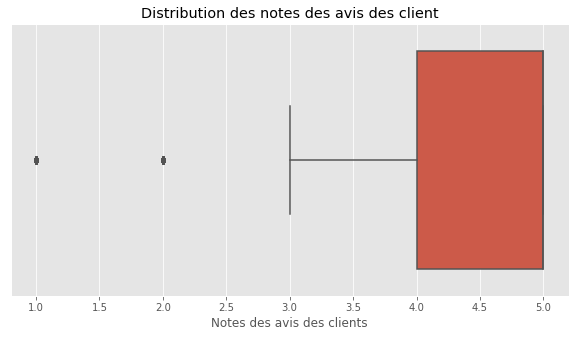

In [243]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=order_reviews['review_score'], orient='h')
plt.title('Distribution des notes des avis des client')
plt.xlabel('Notes des avis des clients')
plt.yticks([])
plt.show()

#### review_answer_timestamp

Shows satisfaction survey answer timestamp.

In [244]:
# transformer en datetime
order_reviews.review_answer_timestamp=pd.to_datetime(order_reviews.review_answer_timestamp,format='%Y-%m-%d %H:%M:%S')

#### review_creation_date


In [245]:
# transformer en datetime
order_reviews.review_creation_date=pd.to_datetime(order_reviews.review_creation_date,format='%Y-%m-%d %H:%M:%S')

#### Bilan_order_review 


In [246]:
order_reviews = order_reviews.drop(['review_comment_title',
                              'review_comment_message',
                              'review_creation_date', 'review_answer_timestamp'],
                             axis=1)

### orders

In [247]:
#dimesions 
orders.shape

(99441, 8)

In [248]:
#premieres lignes
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [249]:
#descriptions
description_variables(orders,'cat')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
type,object,object,object,object,object,object,object,object
nb_nan,0.0,0.0,0.0,0.0,160.0,1783.0,2965.0,0.0
%_nan,0.0,0.0,0.0,0.0,0.160899,1.793023,2.981668,0.0
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [250]:
# Transformer les variables représentant des dates/heures en Datetime
cols = ['order_purchase_timestamp', 'order_approved_at',
        'order_delivered_carrier_date', 'order_delivered_customer_date',
        'order_estimated_delivery_date']
for col in cols:
    orders[col] = pd.to_datetime(orders[col], format='%Y-%m-%d %H:%M:%S')

In [251]:
#types de status
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [252]:
# pourcentage par statut des commandes
series_statuts = orders.groupby('order_status')['order_id'].count()
df_statuts = pd.DataFrame({'Type de statut': series_statuts.index,
                           'Nb_par_statuts': series_statuts.values})
nb_tot = df_statuts['Nb_par_statuts'].sum()
df_statuts['%'] = round((df_statuts['Nb_par_statuts']*100)/nb_tot, 3)
df_statuts.sort_values(by='%', ascending=False)

,Type de statut,Nb_par_statuts,%
3,delivered,96478,97.020
6,shipped,1107,1.113
1,canceled,625,0.629
7,unavailable,609,0.612
4,invoiced,314,0.316
5,processing,301,0.303
2,created,5,0.005
0,approved,2,0.002


#### order_purchase_timestamp/order_delivered_customer_date
Shows the purchase timestamp/Shows the actual order delivery date to the customer --> délai de livraison?

In [253]:
# creation variable délai de livraion
délai_liv=orders.order_delivered_customer_date-orders.order_purchase_timestamp

In [254]:
délai_liv.describe()

count                         96476
mean     12 days 13:24:31.879068369
std       9 days 13:07:00.181125305
min                 0 days 12:48:07
25%          6 days 18:23:37.250000
50%                10 days 05:13:34
75%         15 days 17:17:16.250000
max               209 days 15:05:12
dtype: object

#### order_delivered_customer_date/order_estimated_delivery_date 
Shows the order posting timestamp. When it was handled to the logistic partner/
Shows the estimated delivery date that was informed to customer at the purchase moment.--> délai liv estimé?

In [255]:
délai_liv_estim=orders.order_estimated_delivery_date-orders.order_delivered_customer_date

In [256]:
délai_liv_estim.describe()

count                         96476
mean     11 days 04:17:55.957616402
std      10 days 04:28:00.181984555
min             -189 days +00:35:53
25%                 6 days 09:21:36
50%         11 days 22:46:28.500000
75%         16 days 05:51:54.750000
max               146 days 00:23:13
dtype: object

#### order_approved_at	
Shows the payment approval timestamp.

#### order_delivered_carrier_date
Shows the order posting timestamp. When it was handled to the logistic partner.

#### order_delivered_customer_date
Shows the actual order delivery date to the customer.

### Bilan_orders

### Products
this dataset includes data about the products sold by Olist

In [257]:
# dimensions
products.shape

(32951, 9)

In [258]:
#premières lignes
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [259]:
#descriptions
description_variables(products,'cat')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
type,object,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb_nan,0.0,610.0,610.000000,610.000000,610.000000,2.00000,2.00000,2.00000,2.00000
%_nan,0.0,1.851234,1.851234,1.851234,1.851234,0.00607,0.00607,0.00607,0.00607
count,32951,32341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
description_variables(products,'num')

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_id,product_category_name
type,float64,float64,float64,float64,float64,float64,float64,NaN,NaN
nb_nan,610.0,610.0,610.0,2.0,2.0,2.0,2.0,0.0,610.000000
%_nan,1.851234,1.851234,1.851234,0.00607,0.00607,0.00607,0.00607,0.0,1.851234
count,32341.0,32341.0,32341.0,32949.0,32949.0,32949.0,32949.0,NaN,NaN
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,NaN,NaN
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,NaN,NaN
min,5.0,4.0,1.0,0.0,7.0,2.0,6.0,NaN,NaN
25%,42.0,339.0,1.0,300.0,18.0,8.0,15.0,NaN,NaN
50%,51.0,595.0,1.0,700.0,25.0,13.0,20.0,NaN,NaN
75%,57.0,972.0,3.0,1900.0,38.0,21.0,30.0,NaN,NaN


#### product_category_name
root category of product, in Portuguese.

In [261]:
# les caractéristiques des produits (longueur,poids,photo, hauteur, largeur) sont inutiles.nous les supprimons
products = products.drop(['product_name_lenght','product_description_lenght','product_photos_qty',
                          'product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm'], axis=1)

### Bilan_products

### translation


In [262]:
# dimension
translation.shape

(71, 2)

In [263]:
# premieres lignes
translation.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [264]:
# fusion fichier translation et products via product_category_name
products=pd.merge(products, translation, on='product_category_name', how='left')

In [265]:
#premières lignes
products.head(3)

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure


In [266]:
# description
description_variables(products,'cat')

,product_id,product_category_name,product_category_name_english
type,object,object,object
nb_nan,0.0,610.0,623.0
%_nan,0.0,1.851234,1.890686
count,32951,32341,32328
unique,32951,73,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


In [267]:
# voir les variables non traduites
products[products['product_category_name_english'].isnull() & products['product_category_name']
            .notnull()]

,product_id,product_category_name,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,NaN
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,NaN
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,NaN
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,NaN
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,NaN
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [268]:
# il n'est pas difficile ici d'imputer les deux categories manquantes en anglais
products.loc[(products['product_category_name'] == 'pc_gamer'),'product_category_name_english'] = 'pc_gamer'
products.loc[(products['product_category_name'] =='portateis_cozinha_e_preparadores_de_alimentos'),
                'product_category_name_english'] = 'kitchen and food preparation laptops'

In [269]:
# on supprime la colonne en portugais
products=products.drop('product_category_name',axis=1)

In [270]:
# on renome 
products.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

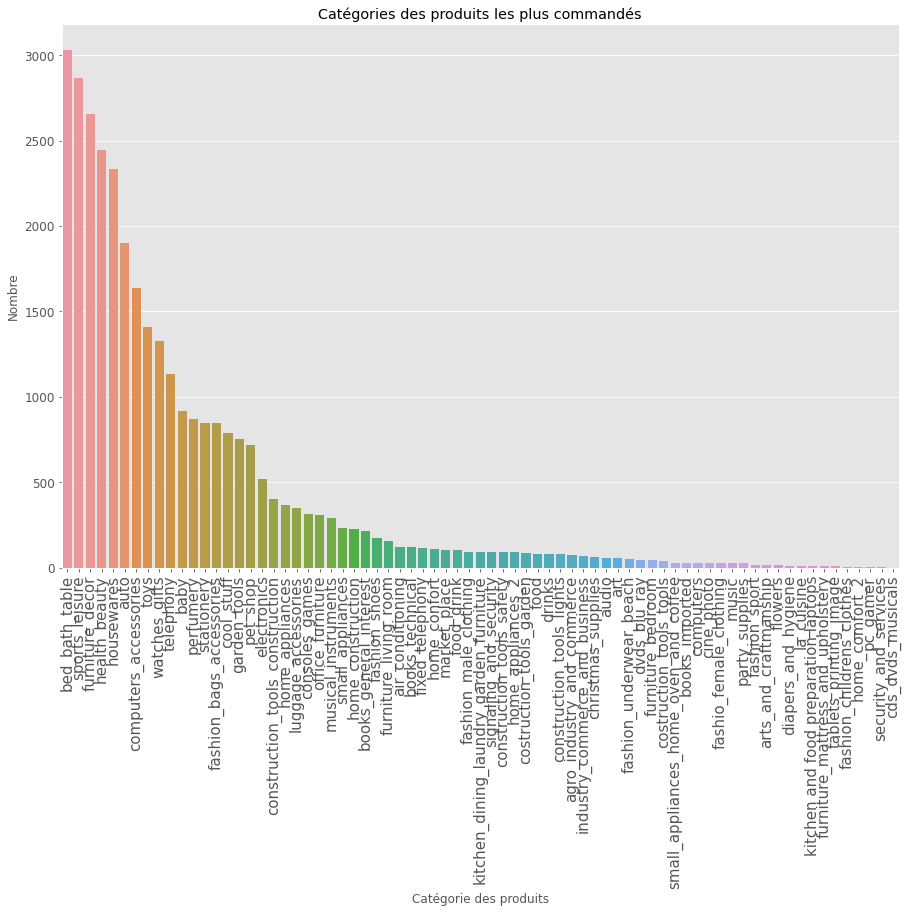

In [271]:
# liste des catégories
plt.figure(figsize=(15, 10))
sns.countplot(data=products, x='product_category_name',order=products.product_category_name.value_counts().index)

plt.title('Catégories des produits les plus commandés')
plt.ylabel('Nombre')
plt.xlabel('Catégorie des produits')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=12)
plt.show()


In [272]:
products.isnull().mean()

product_id               0.000000
product_category_name    0.018512
dtype: float64

In [273]:
# liste des produits 
products.product_category_name.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

In [274]:
# Regroupement des 73

dico_categories = {

    # Food
    'drinks': 'food',
    'food': 'food',
    'food_drink': 'food',
    'la_cuisine': 'food',
    'kitchen_laptops_and_food_preparers': 'food',

    # Fashion
    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',
    'health_beauty': 'fashion',
    'perfumery': 'fashion',
    'diapers_and_hygiene': 'fashion',
    'baby': 'fashion',
    'luggage_accessories': 'fashion',

    # leisure
    'sports_leisure': 'leisure',
    'consoles_games': 'leisure',
    'musical_instruments': 'leisure',
    'toys': 'leisure',
    'cine_photo': 'leisure',
    'dvds_blu_ray': 'leisure',
    'cds_dvds_musicals': 'leisure',
    'music': 'leisure',
    'books_general_interest': 'leisure',
    'books_imported': 'leisure',
    'books_technical': 'leisure',

    # Home
    'furniture_bedroom': 'home',
    'furniture_decor': 'home',
    'furniture_living_room': 'home',
    'furniture_mattress_and_upholstery': 'home',
    'bed_bath_table': 'home',
    'kitchen_dining_laundry_garden_furniture': 'home',
    'office_furniture': 'home',
    'home_appliances': 'home',
    'home_appliances_2': 'home',
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'air_conditioning': 'home',
    'housewares': 'home',
    'art': 'home',
    'arts_and_craftmanship': 'home',
    'flowers': 'home',
    'cool_stuff': 'home',

    # Construction
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'garden_tools': 'construction',
    'home_construction': 'construction',

    # High technology
    'electronics': 'high_technology',
    'audio': 'high_technology',
    'tablets_printing_image': 'high_technology',
    'telephony': 'high_technology',
    'fixed_telephony': 'high_technology',
    'small_appliances': 'high_technology',
    'small_appliances_home_oven_and_coffee': 'high_technology',
    'computers_accessories': 'high_technology',
    'computers': 'high_technology',
    'security_and_services': 'high_technology',
    'signaling_and_security': 'high_technology',

    # Various
    'stationery': 'various',
    'auto': 'various',
    'watches_gifts': 'various',
    'agro_industry_and_commerce': 'various',
    'industry_commerce_and_business': 'various',
    'market_place': 'various',
    'pet_shop': 'various',
    'other': 'various',
     'party_supplies': 'various',
    'christmas_supplies':'various'
}

In [275]:
products.product_category_name = products.product_category_name.map(dico_categories)

In [276]:
products.product_category_name.unique()

array(['fashion', 'home', 'leisure', 'construction', 'high_technology',
       'various', nan, 'food'], dtype=object)

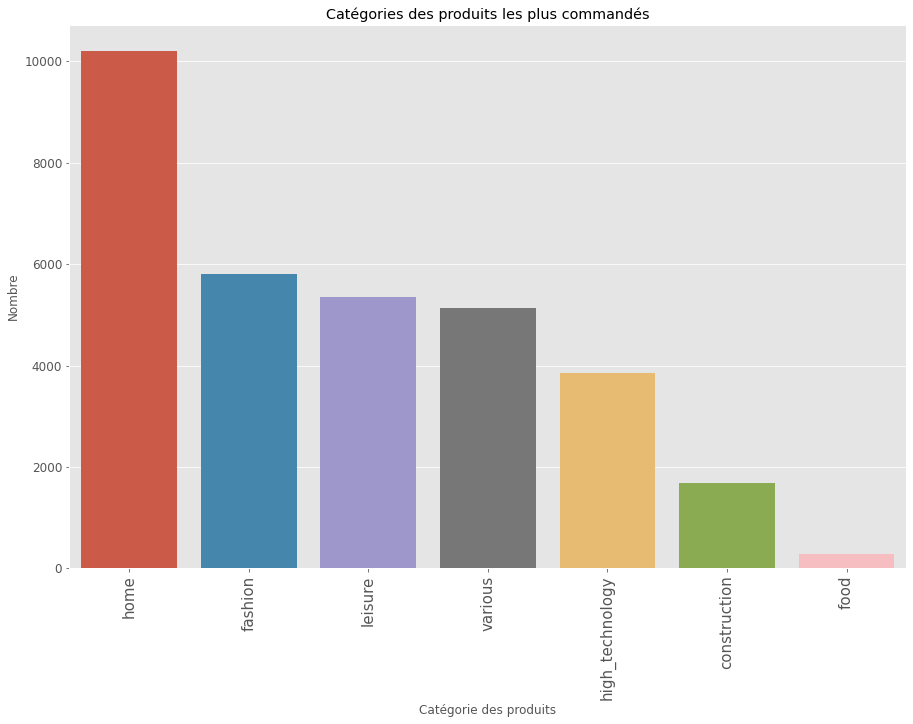

In [277]:
plt.figure(figsize=(15, 10))
sns.countplot(data=products, x='product_category_name',order=products.product_category_name.value_counts().index)

plt.title('Catégories des produits les plus commandés')
plt.ylabel('Nombre')
plt.xlabel('Catégorie des produits')
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=12)
plt.show()

### sellers
this dataset includes data about the sellers that fulfilled orders made at Olist. 
Use it to find the seller location and to identify which seller fulfilled each product.

In [278]:
#dimensions
sellers.shape

(3095, 4)

In [279]:
#premières lignes
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [280]:
#descriptions
description_variables(sellers,'cat')


,seller_id,seller_city,seller_state,seller_zip_code_prefix
type,object,object,object,NaN
nb_nan,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0
count,3095,3095,3095,NaN
unique,3095,611,23,NaN
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP,NaN
freq,1,694,1849,NaN


In [281]:
description_variables(sellers,'num')

,seller_zip_code_prefix,seller_id,seller_city,seller_state
type,int64,NaN,NaN,NaN
nb_nan,0.0,0.0,0.0,0.0
%_nan,0.0,0.0,0.0,0.0
count,3095.0,NaN,NaN,NaN
mean,32291.059451,NaN,NaN,NaN
std,32713.45383,NaN,NaN,NaN
min,1001.0,NaN,NaN,NaN
25%,7093.5,NaN,NaN,NaN
50%,14940.0,NaN,NaN,NaN
75%,64552.5,NaN,NaN,NaN


### Bilan_sellers

# Fusion des bases de données

### Les variables clés essentielles pour la fusion des jeux de données sont :

customers_id,
order_id,
product_id,
seller_id,
zip_code_prefix,
et product_category_name.

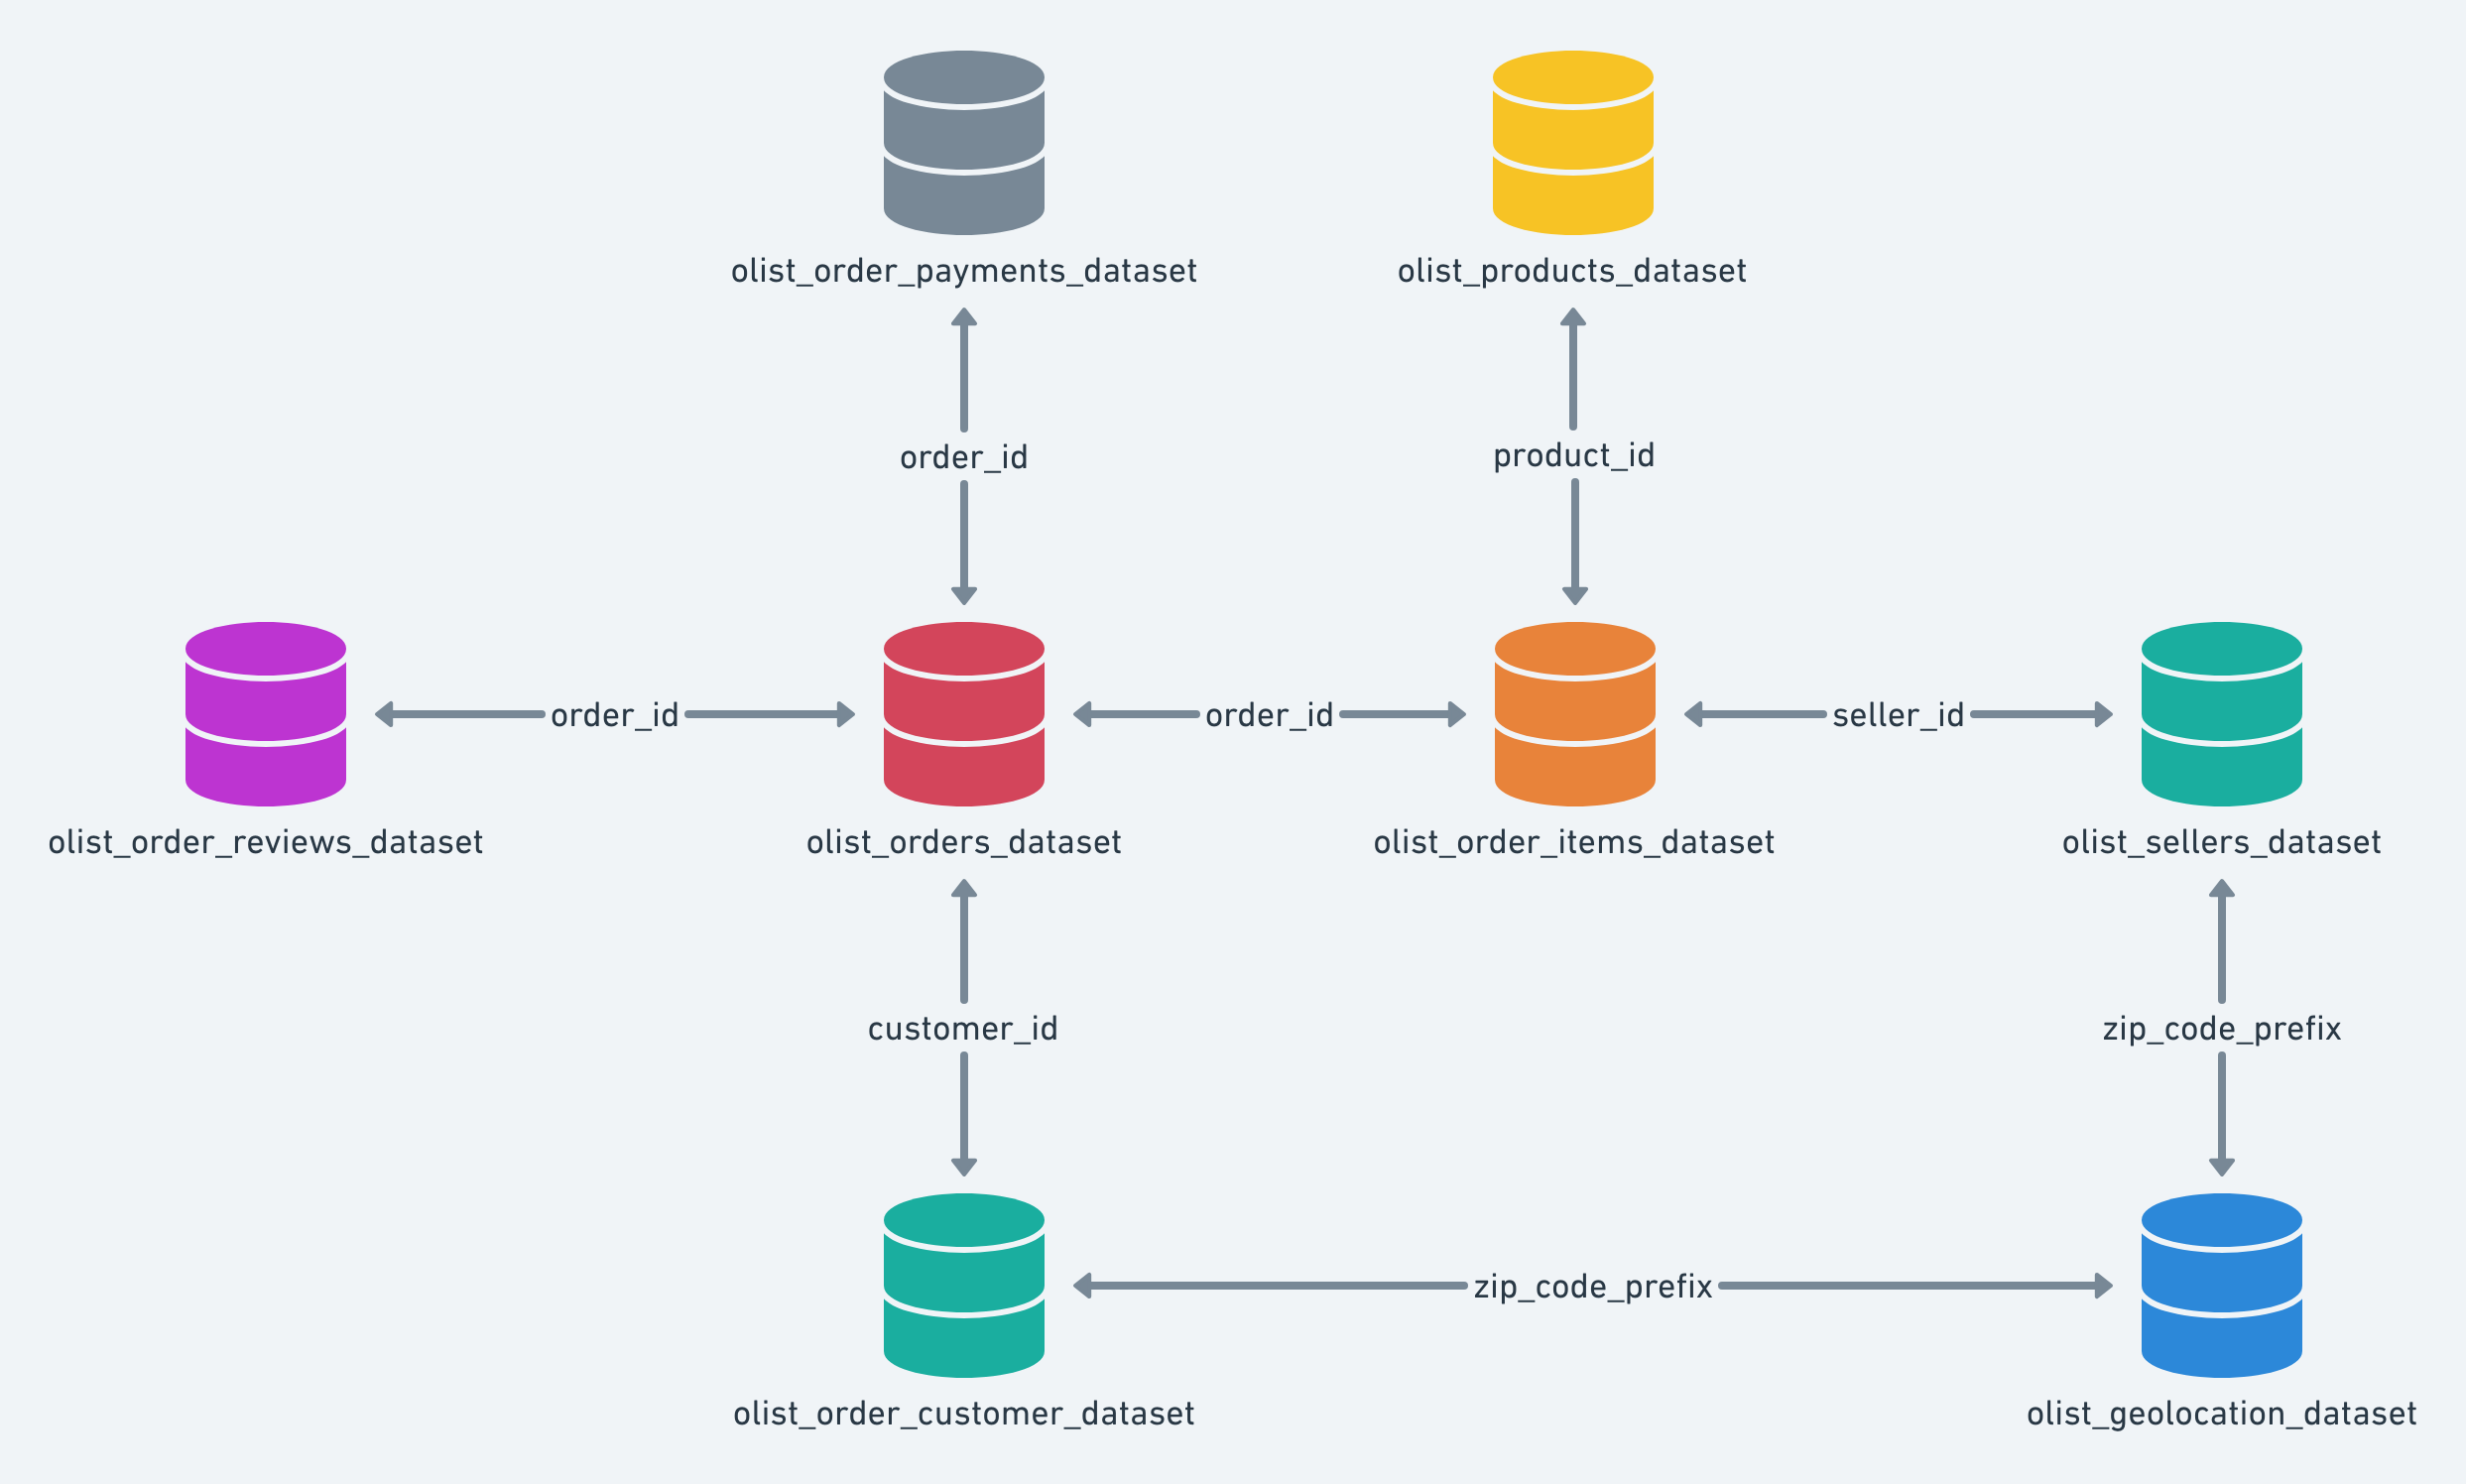

In [282]:
# fusion customers-orders
df1=pd.merge(customers,orders, on='customer_id', how='left')
df1.shape

(99441, 12)

In [283]:
#fusion df1-geolocalisation
df2=pd.merge(df1,geolocalisation,left_on='customer_zip_code_prefix',
               right_on='geolocation_zip_code_prefix', how='left')
df2.shape

(99441, 15)

In [284]:
# fusion df2-orders_review
df3=pd.merge(df2, order_reviews, on='order_id', how='left')
df3.shape

(99992, 17)

In [285]:
#fusion df3-order_item
df4=pd.merge(df3,order_items,on='order_id',how='left')
df4.shape

(114092, 23)

In [286]:
#fusion df4-orders_payments
df5 = pd.merge(df4, order_payments, on='order_id', how='left')
df5.shape

(119143, 27)

In [287]:
#fusion df5-products
df6=pd.merge(df5,products,on='product_id',how='left')
df6.shape

(119143, 28)

# Nettoyage et Analyse

In [288]:
#dataset 
data=df6.copy()

In [289]:
# variables
data.columns.tolist()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'geolocation_zip_code_prefix',
 'geolocation_lat',
 'geolocation_lng',
 'review_id',
 'review_score',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'product_category_name']

In [290]:
#supprimer les variables inutiles après jointure
data = data.drop(['geolocation_zip_code_prefix', 'review_id',
                  'seller_id'], axis=1)

In [291]:
# les commandes livrées constituent 97% de la base, nous nous interessions aux commandes aux cycle complet
data = data[data['order_status'] == 'delivered']
data.shape

(115723, 25)

In [292]:
# supprimer la variable statut

In [293]:
data = data.drop(['order_status'], axis=1)
data.shape

(115723, 24)

In [294]:
data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                 object
customer_city                            object
customer_state                           object
order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
geolocation_lat                         float64
geolocation_lng                         float64
review_score                            float64
order_item_id                           float64
product_id                               object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                            

###  Valeurs manquantes

In [295]:
data.isnull().mean()*100

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.012962
order_delivered_carrier_date     0.001728
order_delivered_customer_date    0.006913
order_estimated_delivery_date    0.000000
geolocation_lat                  0.261832
geolocation_lng                  0.261832
review_score                     0.744018
order_item_id                    0.000000
product_id                       0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_sequential               0.002592
payment_type                     0.002592
payment_installments             0.002592
payment_value                    0.002592
product_category_name            1

<AxesSubplot:>

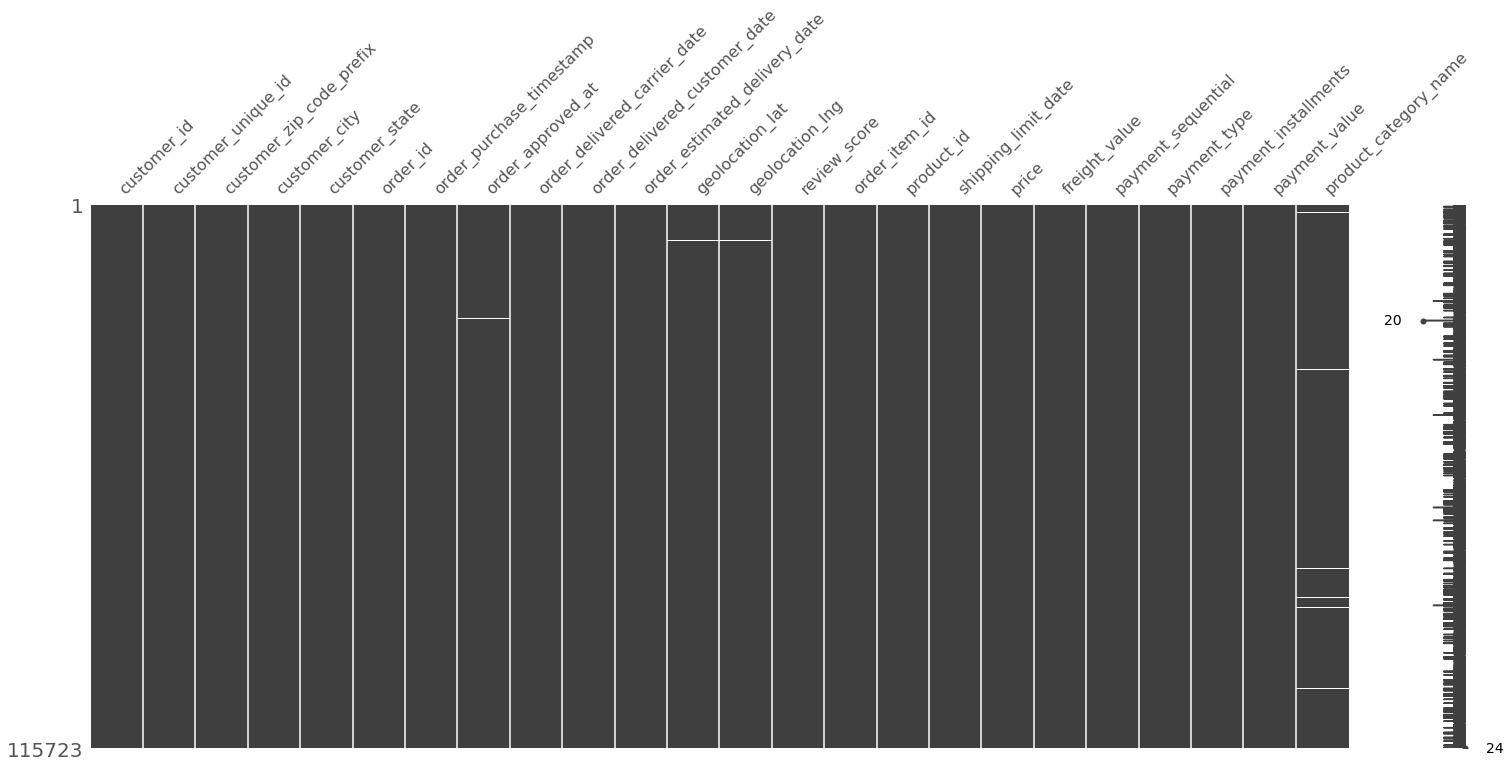

In [296]:
import missingno as msno
msno.matrix(data)

In [297]:
# nous avons un taux de Nan < 2% --> éliminons les NaN sans conséquence sur le volume de notre base
data=data.dropna()
data.shape

(112890, 24)

In [298]:
#verif
data.isnull().mean()*100

customer_id                      0.0
customer_unique_id               0.0
customer_zip_code_prefix         0.0
customer_city                    0.0
customer_state                   0.0
order_id                         0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
geolocation_lat                  0.0
geolocation_lng                  0.0
review_score                     0.0
order_item_id                    0.0
product_id                       0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
product_category_name            0.0
dtype: float64

# Feature engineering

### Méthode RFM segmentation

Il s’agit d’une segmentation très utilisée en marketing et relative simple à effectuer. Vous l’utiliserez surtout dans des contextes où il y a des achats répétés comme les vêtements, la nourriture, les produits de beauté.

La récence permet de situer le dernier achat dans le temps. En effet, plus ce celui-ci sera éloigné et moindre sera la valeur de ce client pour vous. Par exemple, un client dont la dernière date d’achat remonte à la semaine dernière aura plus de chance de revenir à votre enseigne qu’un client dont la dernière date d’achat remonte à l’année dernière.

La fréquence indique le nombre de fois où votre client a fait une transaction pendant une période donnée. Plus celle-ci est élevée, plus élevée sera la valeur de ce client pour vous.

Enfin, le montant correspond à la somme ou moyenne des dépenses de votre client. Encore une fois, plus il est élevé, mieux c’est.

Afin d’établir la RFM, il est commun de procéder par scoring, en attribuant un système de points à chaque indicateur de la RFM.

#### Récence


In [299]:
date_max=data.order_purchase_timestamp.max()
date_max

Timestamp('2018-08-29 15:00:37')

In [300]:
# la dernière date d'achatpour chaque client 
# x= data['order_purchase_timestamp'].max()
# recence=date_max-x


#### Fréquence

In [301]:
# nous compterons le nombre d'ordre à travers customer_id

#### Montant

In [302]:
# nous ferons la somme de la variable payment_value par client

### base de donnée_RFM

In [303]:
rfm = data.groupby('customer_unique_id').agg(
                 recence = ('order_purchase_timestamp', lambda x:(date_max - x.max()).days),
                 freq = ('customer_id', 'count'),
                 montant_sum = ('payment_value', 'sum'))

In [304]:
rfm

,recence,freq,montant_sum
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
ffff371b4d645b6ecea244b27531430a,567,1,112.46


In [305]:
# Export des données pour analyse ultérieure
rfm.to_csv('rfm.csv')

In [306]:
# compléter la base data avec rfm
data=pd.merge(data,rfm,on='customer_unique_id',how='left')

In [307]:
data.shape

(112890, 27)

### indicateur pour segmentation géographique
C’est-à-dire en fonction du lieu de résidence ou de consommation du service / produit ou du lieu où ils travaillent. Vous vous poserez alors des questions comme : vos clients sont-ils sur-représentés dans certaines régions ? À quelle distance sont-ils de vos enseignes physiques ? Habitent-ils plutôt à la campagne que dans des grandes villes ?

In [308]:
#régions de residence des clients
data.customer_state.nunique()

27

In [309]:
# villes de résidence des clients
data.customer_city.nunique()

4028

In [310]:
villes=data.groupby(['customer_city']).count()['customer_state'].sort_values(ascending=False)

In [311]:
villes=pd.DataFrame(villes)
villes

,customer_state
customer_city,
sao paulo,17866
rio de janeiro,7782
belo horizonte,3140
brasilia,2198
curitiba,1767
...,...
manoel urbano,1
manfrinopolis,1
mandirituba,1


In [312]:
villes.describe()

,customer_state
count,4028.000000
mean,28.026316
std,323.208933
min,1.000000
25%,1.750000
50%,3.000000
75%,10.000000
max,17866.000000


In [313]:
#  25% des villes soit 0.25*4028=1007 villes ont plus de 10 habitants
# nous gardons le top 150 des villes ce qui correspond à un minimum de 107 habitants et mettons autres pour le reste

top150=villes.head(150)


In [314]:
top150.describe()

,customer_state
count,150.000000
mean,513.800000
std,1603.111932
min,107.000000
25%,143.250000
50%,214.000000
75%,355.250000
max,17866.000000


In [315]:
# remplaçons les données de géolocalisation par la distance entre Olist et le lieu de residence des clients

# definition de la fonction haversine
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [316]:
# Olist location
olist_lat = -25.43045
olist_lon = -49.29207

In [317]:
# Haversine distance entre state et Olist 
from math import radians,sin,cos,asin,sqrt
data['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(data.geolocation_lat, 
                                              data.geolocation_lng)]

In [318]:
data.columns.tolist()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_id',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'geolocation_lat',
 'geolocation_lng',
 'review_score',
 'order_item_id',
 'product_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'product_category_name',
 'recence',
 'freq',
 'montant_sum',
 'harvesine_distance']

### indicateurs pour segmentation psychographique et comportementale
La segmentation psychographique est basée sur le mode de vie : les hobbies, les intérêts, les opinions ou encore les traits de personnalité. La segmentation sur le comportement sont des informations liées à : la fréquence d’achat, les marques préférées, la sensibilité au prix, la loyauté, l’engagement, l’utilisation du site Web. 

In [319]:
# un client peut donner plusieurs score, ajoutons un score moyen
scor_mean = data.groupby('customer_unique_id')['review_score'].mean()
data['scor_avg'] = data['customer_unique_id'].map(scor_mean)
# ajoutons le nombre de commandes par client
nbr_commandes = data.groupby('customer_unique_id')['order_id'].count()
data['nbr_commandes'] = data['customer_unique_id'].map(nbr_commandes)
# ajoutons le nombre d'écheances moyen
echeance_moy = data.groupby('customer_unique_id')['payment_installments'].mean()
data['echeance_paiement_avg'] = data['customer_unique_id'].map(echeance_moy)
# Date du dernier achat
s_dernier_achat = data.groupby('customer_unique_id')[
    'order_purchase_timestamp'].max()
data['date_dernier_achat'] = data['customer_unique_id'] \
    .map(s_dernier_achat)
#ajoutons le total des freight par client
frais_port_moy = data.groupby('customer_unique_id')['freight_value'] .mean()
data['frais_port_avg'] = data['customer_unique_id'] .map(frais_port_moy)
# Panier moyen
prix_moy = data.groupby('customer_unique_id')['price'].mean()
data['panier_moyen'] = data['customer_unique_id'].map(prix_moy)
# mode de paiment le plus frequent
df_moy_paiement = data[['customer_unique_id', 'payment_type']] \
    .sort_values(['customer_unique_id', 'payment_type'],
                 ascending=False).groupby(
    ['customer_unique_id', 'payment_type']).head(1)[
    ['customer_unique_id', 'payment_type']]
# Renommer la variable en moyen_paiement_prefere
df_moy_paiement.rename(
    columns={'payment_type': 'moyen_paiement_prefere'}, inplace=True)
# Merge avec dataframe date pour ajouter la variable
data = pd.merge(data, df_moy_paiement, on='customer_unique_id',
                how='left')

In [320]:
data.columns.tolist()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'order_id',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'geolocation_lat',
 'geolocation_lng',
 'review_score',
 'order_item_id',
 'product_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'product_category_name',
 'recence',
 'freq',
 'montant_sum',
 'harvesine_distance',
 'scor_avg',
 'nbr_commandes',
 'echeance_paiement_avg',
 'date_dernier_achat',
 'frais_port_avg',
 'panier_moyen',
 'moyen_paiement_prefere']

In [321]:
# les variables de jointure ou servant à créer de nouvelles variables ne sont plus utiles
del_cols=['customer_id',
 'customer_zip_code_prefix',
'order_id',
 'order_approved_at',
'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'geolocation_lat',
 'geolocation_lng',
  'review_score',
 'payment_type',
 'order_item_id',
 'product_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_installments',
 'payment_value']

In [322]:
# data à utiliser pour les clients
data_client=data.drop(del_cols, axis=1)

In [323]:
data_client.columns.tolist()

['customer_unique_id',
 'customer_city',
 'customer_state',
 'product_category_name',
 'recence',
 'freq',
 'montant_sum',
 'harvesine_distance',
 'scor_avg',
 'nbr_commandes',
 'echeance_paiement_avg',
 'date_dernier_achat',
 'frais_port_avg',
 'panier_moyen',
 'moyen_paiement_prefere']

In [324]:
data_client.shape

(119565, 15)

In [325]:
# Dictionnaire permettant de faire les aggrégations
dico_aggr = {'customer_city': lambda x: x.mode()[0],
             'customer_state': lambda x: x.mode()[0],
              'product_category_name':lambda x:x.mode()[0],
             'recence': 'mean',
             'freq': 'mean',
             'montant_sum': 'mean',
             'harvesine_distance':'mean',
             'date_dernier_achat':'max',
             'scor_avg': 'mean',
             'nbr_commandes': 'sum',
             'echeance_paiement_avg': 'mean',
             'panier_moyen': 'mean',
             'moyen_paiement_prefere': lambda x: x.mode()[0],
             'frais_port_avg': 'mean'}

In [326]:
# Aggrégation des différentes variables avec l'identifiant unique
data_client = data_client.groupby(['customer_unique_id']).agg(dico_aggr)

In [327]:
data_client.shape

(91212, 14)

# Analyse exploratoire

## variables qualitatives

In [333]:
quali=data_client.select_dtypes(exclude=[np.number]).columns.tolist()

In [334]:
quali

['customer_city',
 'customer_state',
 'product_category_name',
 'date_dernier_achat',
 'moyen_paiement_prefere']

In [335]:

quali.remove('customer_city')
quali.remove('date_dernier_achat')

In [336]:
def countplot(dataframe, liste_variables):
    """
    Suivi des dipsersions : boxplot et qqplot
   
    """
    for col in liste_variables:
        plt.figure(figsize=(8, 6))
        sns.countplot(y=col, data=dataframe)
        plt.title('Distribution de ' + col)
        plt.show()


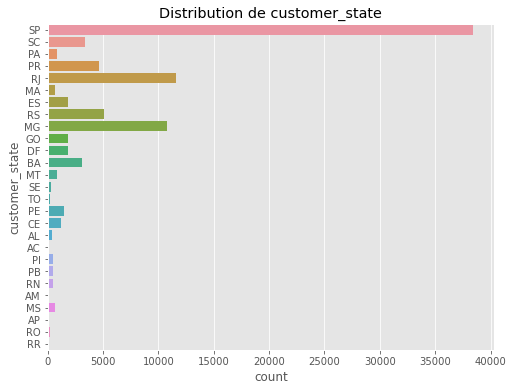

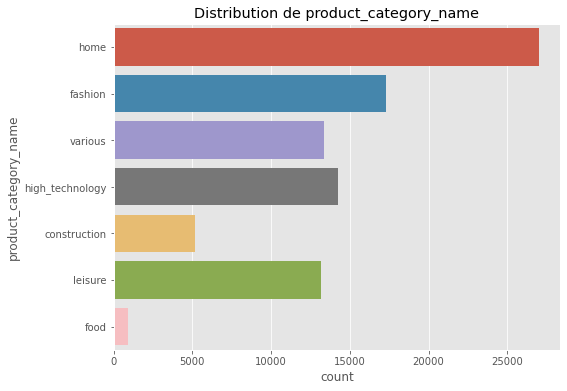

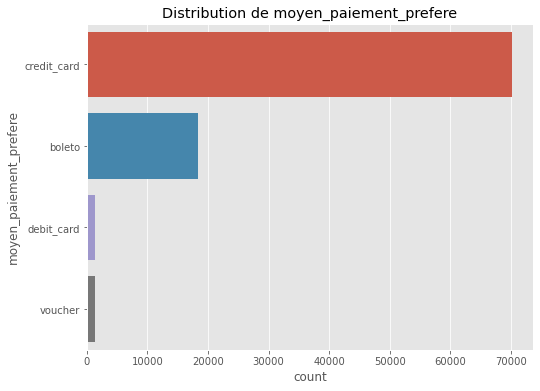

In [337]:
countplot(data_client,quali)

## variables quantitatives 

In [338]:
quant=data_client.select_dtypes(include=[np.number]).columns.tolist()

In [339]:
quant

['recence',
 'freq',
 'montant_sum',
 'harvesine_distance',
 'scor_avg',
 'nbr_commandes',
 'echeance_paiement_avg',
 'panier_moyen',
 'frais_port_avg']

In [340]:
def stat_descriptives(dataframe, liste_variables):
    """
    Statistiques descriptives moyenne, mediane, variance, écart-type,
    skewness et kurtosis du dataframe transmis en paramètre
    """
    liste_mean = ['mean']
    liste_median = ['median']
    liste_var = ['var']
    liste_std = ['std']
    liste_skew = ['skew']
    liste_kurtosis = ['kurtosis']
    liste_mode = ['mode']
    liste_cols = ['Desc']
    liste_max = ['Max']
    liste_min = ['Min']

    for col in liste_variables:
        liste_mean.append(dataframe[col].mean())
        liste_median.append(dataframe[col].median())
        liste_var.append(dataframe[col].var(ddof=0))
        liste_std.append(dataframe[col].std(ddof=0))
        liste_skew.append(dataframe[col].skew())
        liste_kurtosis.append(dataframe[col].kurtosis())
        liste_cols.append(col)
        liste_mode.append(dataframe[col].mode().to_string())
        liste_min.append(dataframe[col].min())
        liste_max.append(dataframe[col].max())

    data_stats = [liste_mean, liste_median, liste_var, liste_std, liste_skew,
                  liste_kurtosis, liste_mode, liste_min, liste_max]
    df_stat = pd.DataFrame(data_stats, columns=liste_cols)

    return df_stat.style.hide_index()

In [341]:
stat_descriptives(data_client,quant)

C:\Users\mehan\AppData\Local\Temp\ipykernel_17488\2909263405.py:33: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  return df_stat.style.hide_index()


Desc,recence,freq,montant_sum,harvesine_distance,scor_avg,nbr_commandes,echeance_paiement_avg,panier_moyen,frais_port_avg
mean,236.109415,1.237666,212.352124,446.477711,4.154497,2.582325,2.903366,125.684734,20.206554
median,217.000000,1.000000,112.880000,307.821253,5.000000,1.000000,2.000000,79.000000,16.422500
var,23278.371026,0.713567,399329.416435,144595.109894,1.636617,701.494242,7.183890,35645.732242,247.589968
std,152.572511,0.844729,631.925167,380.256637,1.279303,26.485737,2.680278,188.800774,15.734992
skew,0.451257,15.925992,71.624173,1.951490,-1.479058,135.210165,1.610805,7.518203,5.665662
kurtosis,-0.659450,813.675436,10398.675236,3.433737,0.962857,24882.041922,2.407773,105.318680,60.533002
mode,0 277.0,0 1.0,0 77.57,0 403.000181,0 5.0,0 1,0 1.0,0 59.9,0 15.1
Min,0.000000,1.000000,9.590000,0.421436,1.000000,1,0.000000,0.850000,0.000000
Max,694.000000,75.000000,109312.640000,5336.639365,5.000000,5625,24.000000,6735.000000,409.680000


C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

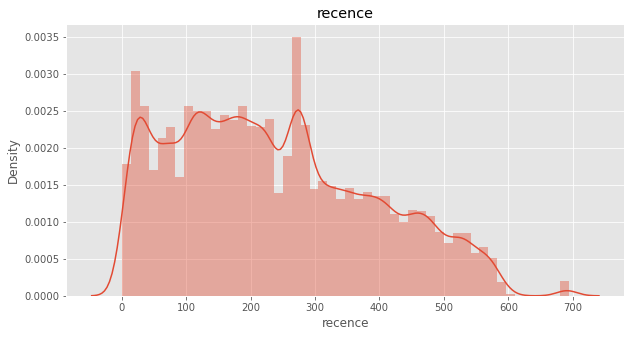

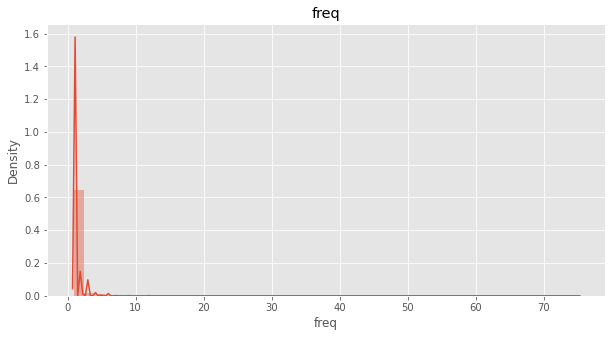

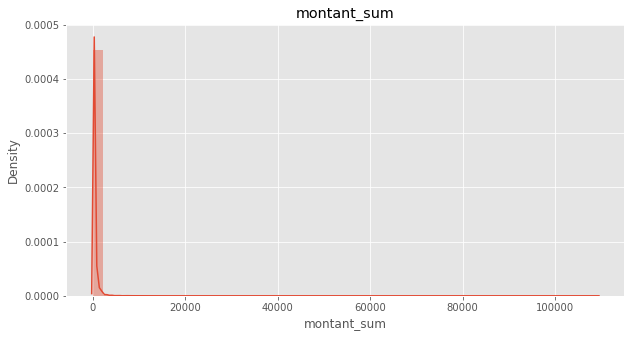

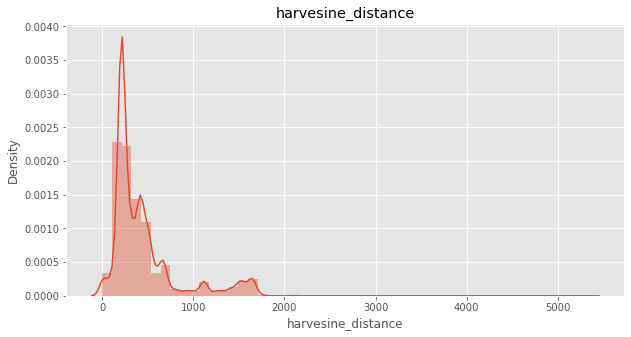

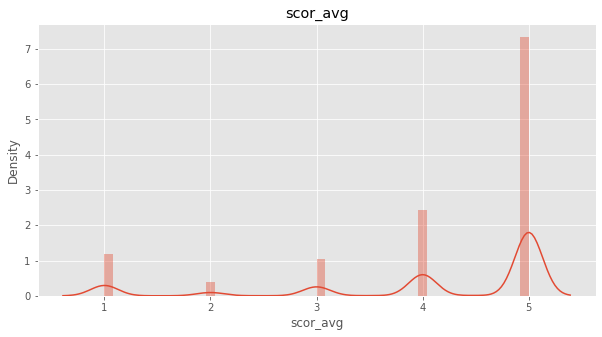

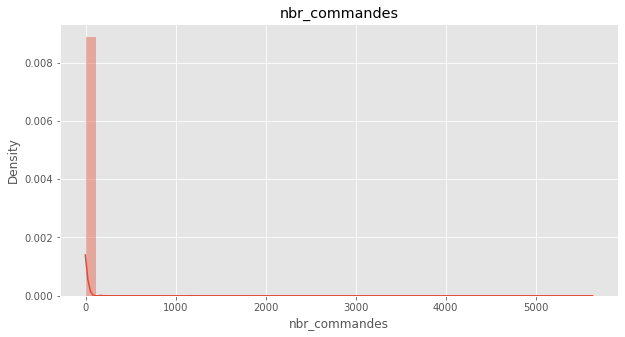

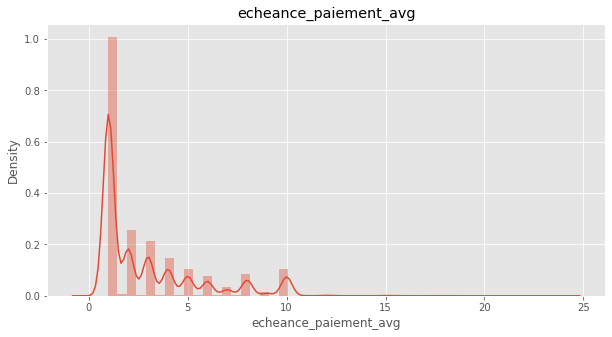

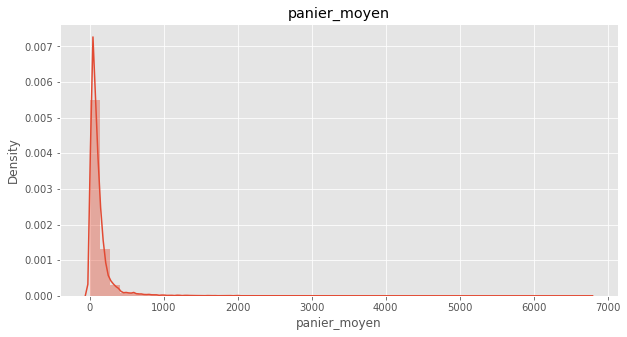

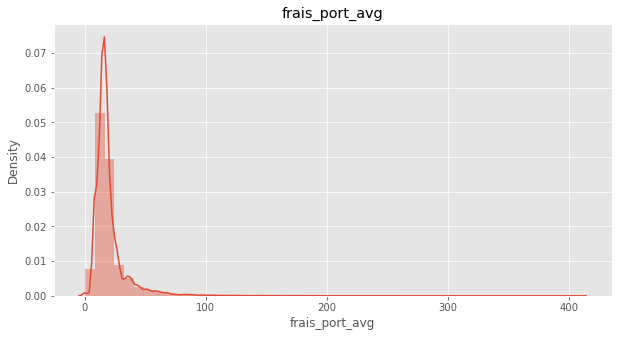

In [342]:
for i in data_client[quant]:
    plt.figure(figsize=(10, 5))
    sns.distplot(data_client[quant][i])
    plt.title(i)

In [343]:
def histplot_boxplot(dataframe, liste_variables):
    """
    Suivi des dipsersions : boxplot 
    """
    for col in liste_variables:
        plt.subplot(1, 2, 1)
        sns.distplot(dataframe[col])
        plt.style.use('ggplot')

      # Boxplot de "payment_value"
        plt.subplot(1, 2, 2)
        sns.boxplot(dataframe[col])
        plt.show()
     

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


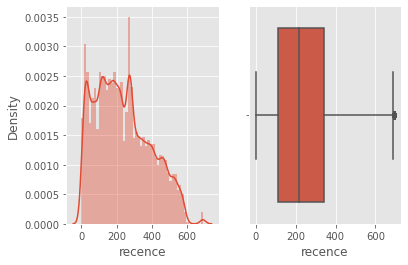

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


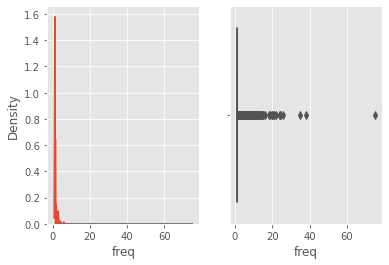

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


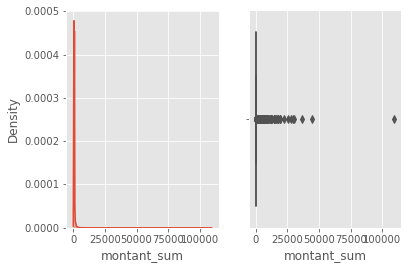

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


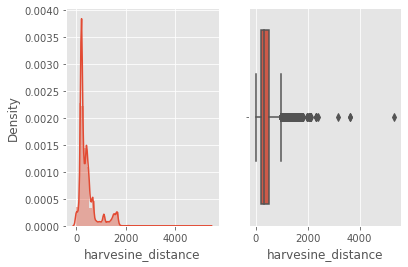

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


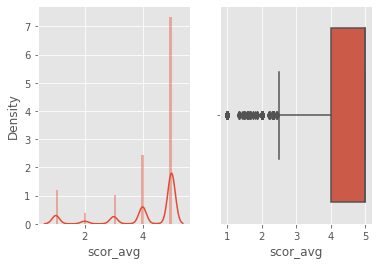

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


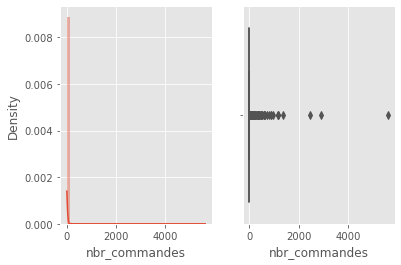

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


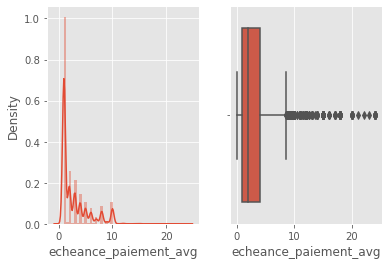

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


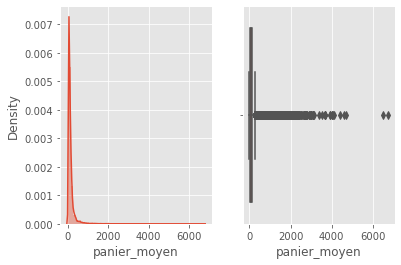

C:\Users\mehan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mehan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


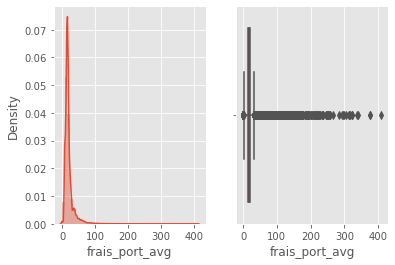

In [344]:
histplot_boxplot(data_client,quant)

### bilan_stat_descriptives

## Matrice de corrélation

Text(0.5, 1.0, 'Correlation Indicators')

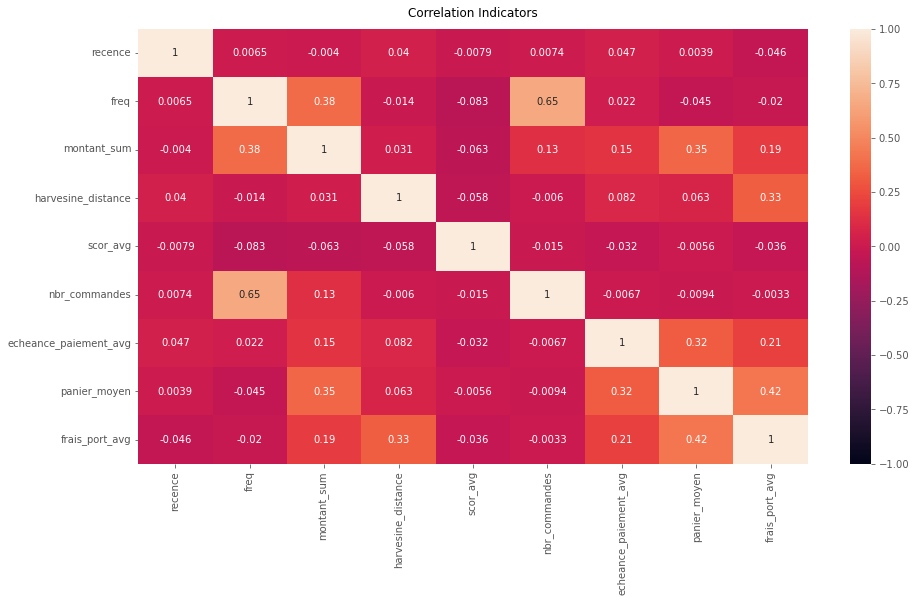

In [345]:
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(data_client[quant].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Indicators', fontdict={'fontsize':12}, pad=12)

In [346]:
#les variables nbr_commandes et freq sont correlés ---> même information on garde freq
data_client=data_client.drop('nbr_commandes',axis=1)
quant.remove('nbr_commandes')

Text(0.5, 1.0, 'Correlation Indicators')

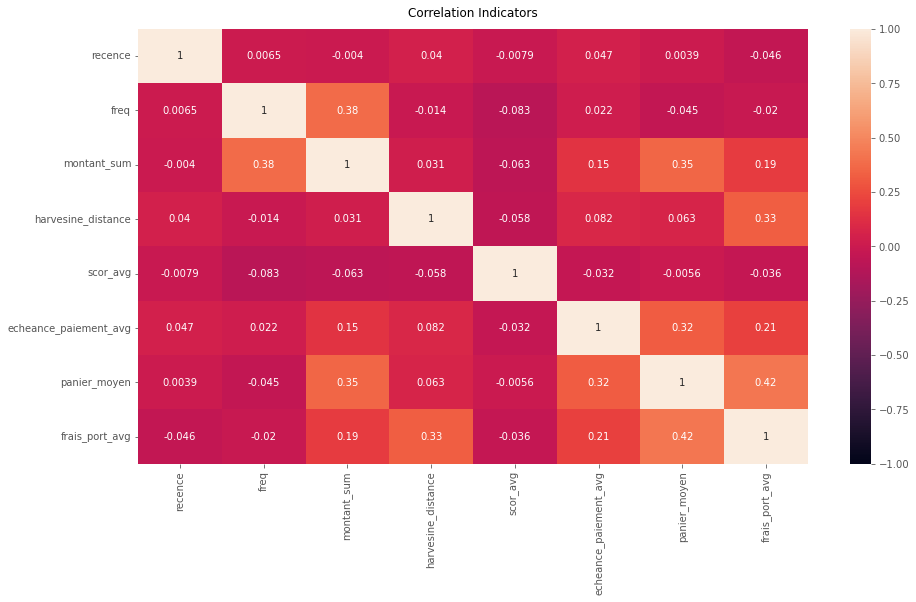

In [347]:
#verif
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(data_client[quant].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Indicators', fontdict={'fontsize':12}, pad=12)

<Figure size 1080x576 with 0 Axes>

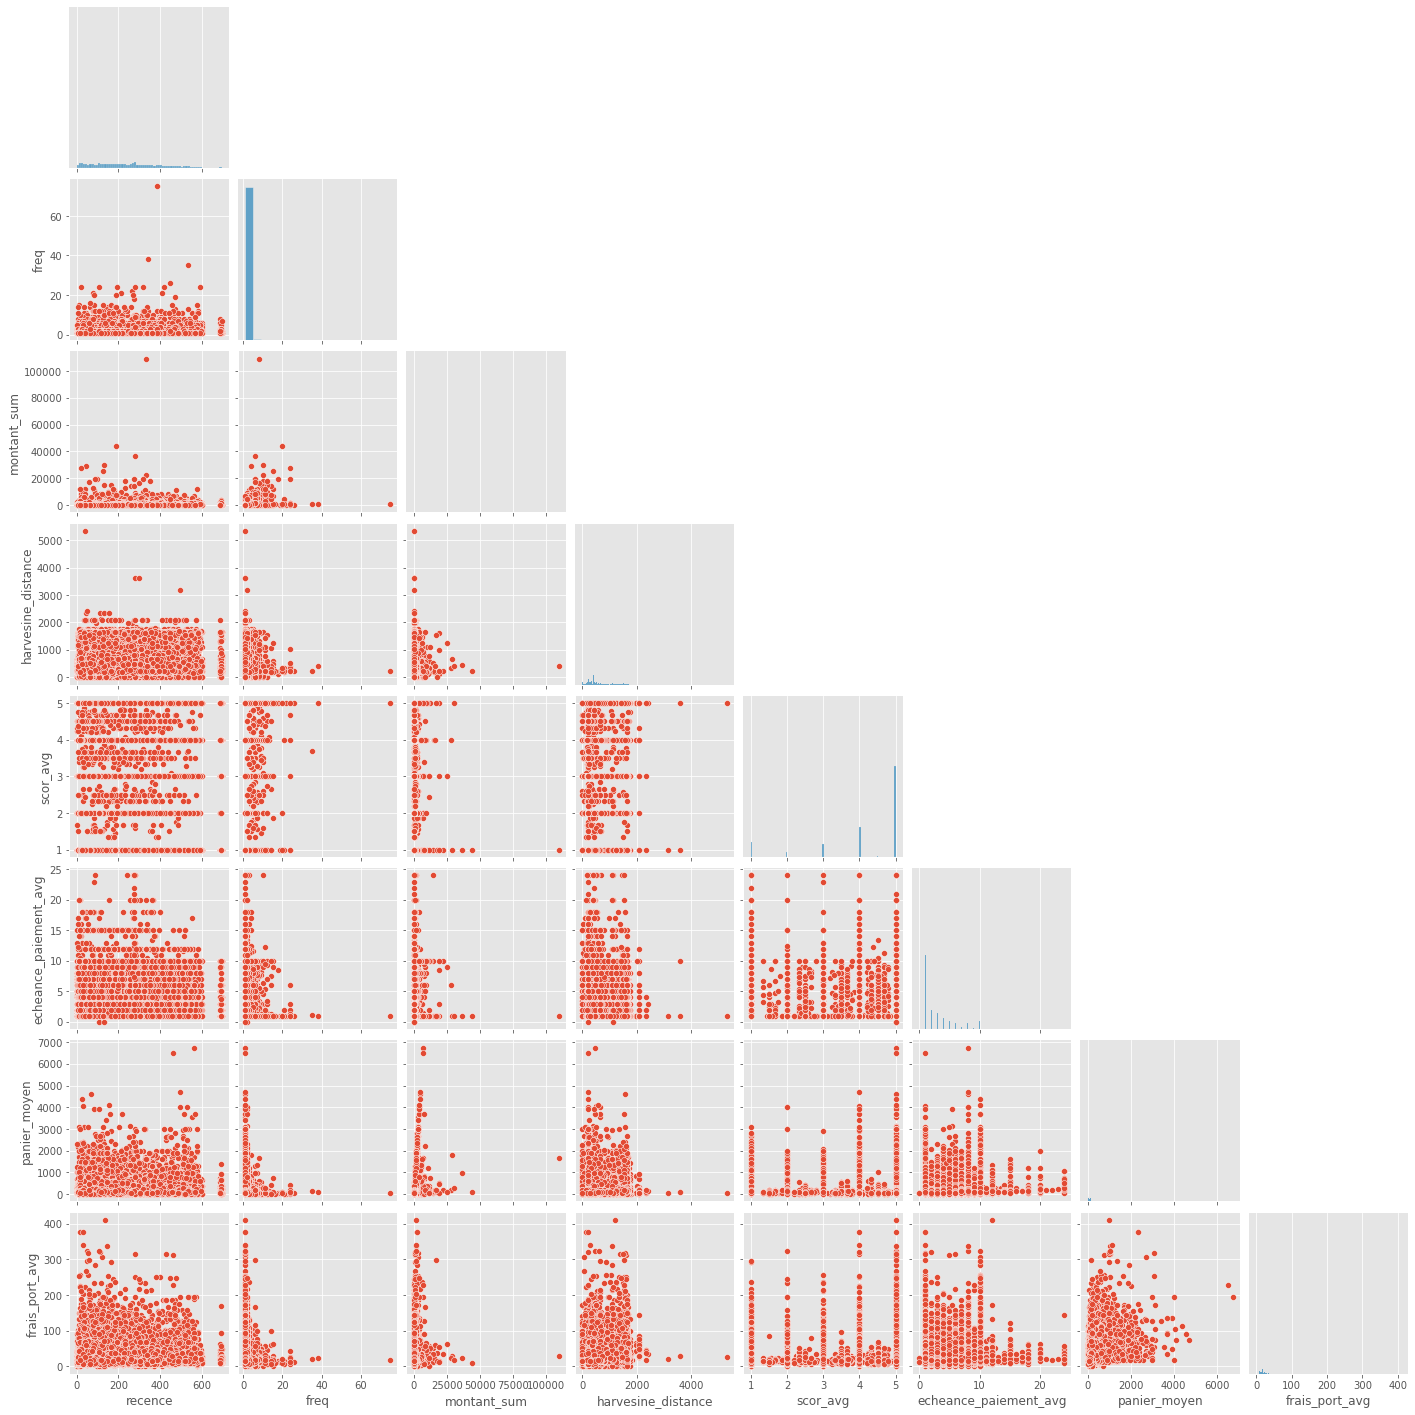

In [348]:
plt.figure(figsize=(15,8))
sns.pairplot(data_client[quant],corner=True)

In [349]:
from scipy import stats
numeric_columns=data_client[quant]
numeric_columns = numeric_columns[1:]

for column in numeric_columns:
    print('________\n{}'.format(column))
    D, p = stats.kstest(data_client[column].dropna(),'norm', args=(data_client[column].mean(), data_client[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print('hyp null rejetée : {} ne suit pas une distribution gaussienne'.format(column))
    else:
        print('hyp null acceptée":{}  suit une distribution gaussienne')

________
recence
p = 3.76801452015208e-302
hyp null rejetée : recence ne suit pas une distribution gaussienne
________
freq
p = 0.0
hyp null rejetée : freq ne suit pas une distribution gaussienne
________
montant_sum
p = 0.0
hyp null rejetée : montant_sum ne suit pas une distribution gaussienne
________
harvesine_distance
p = 0.0
hyp null rejetée : harvesine_distance ne suit pas une distribution gaussienne
________
scor_avg
p = 0.0
hyp null rejetée : scor_avg ne suit pas une distribution gaussienne
________
echeance_paiement_avg
p = 0.0
hyp null rejetée : echeance_paiement_avg ne suit pas une distribution gaussienne
________
panier_moyen
p = 0.0
hyp null rejetée : panier_moyen ne suit pas une distribution gaussienne
________
frais_port_avg
p = 0.0
hyp null rejetée : frais_port_avg ne suit pas une distribution gaussienne


# Export jeu de donné néttoyé

In [351]:
data_client.shape

(91212, 13)

In [350]:
data_client.columns.tolist()

['customer_city',
 'customer_state',
 'product_category_name',
 'recence',
 'freq',
 'montant_sum',
 'harvesine_distance',
 'date_dernier_achat',
 'scor_avg',
 'echeance_paiement_avg',
 'panier_moyen',
 'moyen_paiement_prefere',
 'frais_port_avg']

In [352]:
data_client.to_csv('data_client_clean.csv')